In [2]:
import core.DEA as DEA
import core.NDEA as NDEA
import core.util as uitl
import core.data as data
import matplotlib.pyplot as plt


In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
'''
The enviroment
Python 3.8.17
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[x86])
Copyright (c) 2022, Gurobi Optimization, LLC
'''

'\nPython 3.8.17\nGurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[x86])\nCopyright (c) 2022, Gurobi Optimization, LLC\n'

In [ ]:
single_data = []

In [ ]:
DEA(single_data, "CRS")

In [ ]:
NDEA(single_data, model_type="CRS")

In [6]:
def rounding(a_list, dit=3):
    return list(map(lambda x: round(x, dit), a_list))


1/2
NDEA_CRS: [0.866, 0.885, 0.938, 0.85, 0.836]
NDEA_VRS: [0.968, 0.924, 0.946, 0.994, 0.956]
DEA_CRS: [1.0, 1.0, 1.0, 1.0, 0.857]
DEA_VRS: [1.0, 1.0, 1.0, 1.0, 1.0]


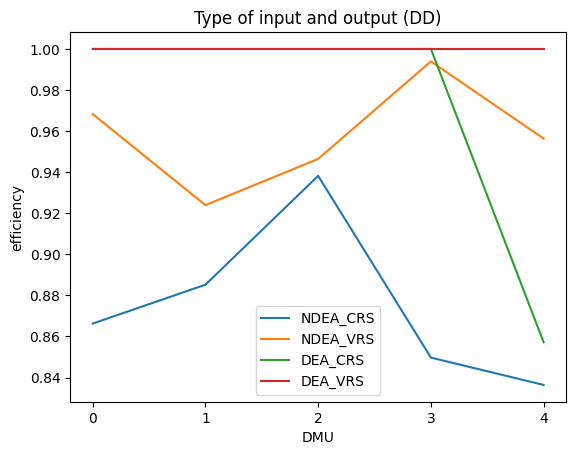

2/2
NDEA_CRS: [0.95, 0.878, 0.813, 0.831, 0.874]
NDEA_VRS: [0.971, 0.935, 0.856, 0.998, 0.98]
DEA_CRS: [1.0, 1.0, 0.348, 0.695, 1.0]
DEA_VRS: [1.0, 1.0, 0.426, 1.0, 1.0]


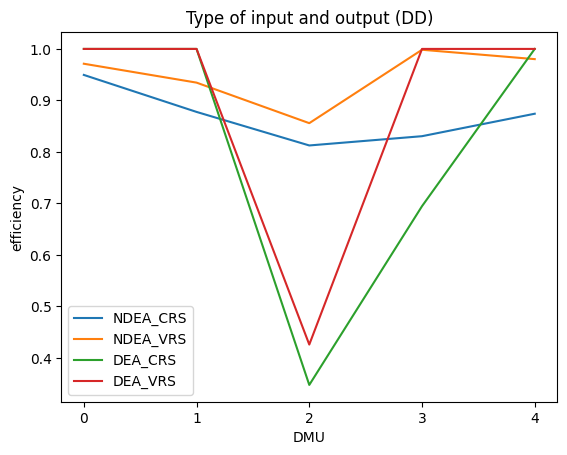

In [7]:

# Setting

passing_dataset = []
passing_result = {}
total = 2
epsilon = 0.001

setting_type = "DD"
# random generate the pass dataset
while len(passing_dataset) < total:
    idx = len(passing_dataset)

    # model_result, label = single_model(temp:=dataset_generate_trend(N=5, type="DD", input_idx=0))
    a_data = data.generate_dataset(N=5, type=setting_type, input_idx=0)
    NDEA_CRS, feasiable_NEDA_CRS = NDEA.NDEA(a_data, model_type="CRS")
    NDEA_VRS, feasiable_NEDA_VRS = NDEA.NDEA(a_data, model_type="VRS")
    DEA_CRS, feasiable_EDA_CRS = DEA.DEA(a_data, model_type="CRS")
    DEA_VRS, feasiable_EDA_VRS = DEA.DEA(a_data, model_type="VRS")

    feasiable_cheker = feasiable_NEDA_CRS + feasiable_NEDA_VRS
    # feasiable_cheker = feasiable_NEDA_CRS + feasiable_NEDA_VRS + feasiable_EDA_CRS + feasiable_EDA_VRS
    
    if all(x == True for x in feasiable_cheker):
        print(f"\r{idx+1}/{total}")


        # store the results
        passing_dataset.append(a_data)
        # passing_result[idx] = {}
        # passing_result[idx]["NDEA_CRS"] = rounding(NDEA_CRS)
        # passing_result[idx]["NDEA_VRS"] = rounding(NDEA_VRS)
        # passing_result[idx]["DEA_CRS"]  = rounding(DEA_CRS)
        # passing_result[idx]["DEA_VRS"]  = rounding(DEA_VRS)

        print('NDEA_CRS:', rounding(NDEA_CRS))
        print('NDEA_VRS:', rounding(NDEA_VRS))
        print('DEA_CRS:', rounding(DEA_CRS))
        print('DEA_VRS:', rounding(DEA_VRS))

        result = {'NDEA_CRS':rounding(NDEA_CRS),
                  'NDEA_VRS': rounding(NDEA_VRS),
                  'DEA_CRS': rounding(DEA_CRS),
                  "DEA_VRS": rounding(DEA_VRS)
        }

        rusult_name = ['model_CRS_result','model_VRS_result', 'CRS_result', 'VRS_result']
        

        # print(rusult_name)
        plt.plot(NDEA_CRS, label="NDEA_CRS")
        plt.plot(NDEA_VRS, label="NDEA_VRS")
        plt.plot(DEA_CRS, label="DEA_CRS")
        plt.plot(DEA_VRS, label="DEA_VRS")
        plt.xlabel('DMU')
        
        plt.ylabel('efficiency')
        plt.xticks([0,1,2,3,4])
        plt.legend()
        plt.title(f"Type of input and output ({setting_type})")
        plt.show()
        plt.close()


# store the result to txt or other files
# passing_dataset